<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#df = pd.read_csv("cleaned_merged_heart_dataset.csv")
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
df.fillna(df.mean(), inplace=True)  # Fills missing values with column mean


In [4]:
#df = df.drop(columns=['thal']) #if we run this model by the 'Cardiovascular_Disease_Dataset.csv' dataset than this line will be comment out

In [5]:
X = df.iloc[: , 1:-1].values #if we run this model by the 'Cardiovascular_Disease_Dataset.csv' dataset than the X will be (df.iloc[:, 1:-1])
Y = df.iloc[: , -1].values

In [6]:
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = Y)

In [8]:
# Check for NaN values
print("NaN values in X_train:\n", np.isnan(X_train).sum())
print("NaN values in X_test:\n", np.isnan(X_test).sum())

# Check for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum())


NaN values in X_train:
 0
NaN values in X_test:
 0
Infinite values in X_train: 0
Infinite values in X_test: 0


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 5, 10],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Limit features considered at each split
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)


# After grid_search.fit(), remove the manual model definition and use best_tree directly
best_tree = grid_search.best_estimator_

# Cross-validation with the best model
cv_scores = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Accuracy: 0.9429 ± 0.0186


In [11]:
# Predictions and evaluation using best_tree
y_pred = best_tree.predict(X_test)
y_pred_prob = best_tree.predict_proba(X_test)[:, 1]

In [12]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9733
Precision: 0.9770
Recall: 0.9770
F1 Score: 0.9770
AUC-ROC Score: 0.9726

Confusion Matrix:
[[122   4]
 [  4 170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       126
           1       0.98      0.98      0.98       174

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



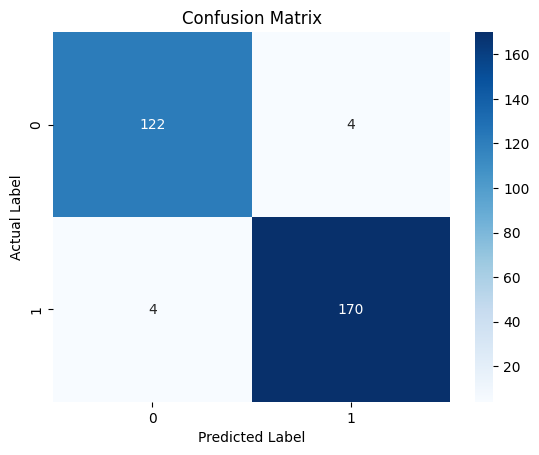

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


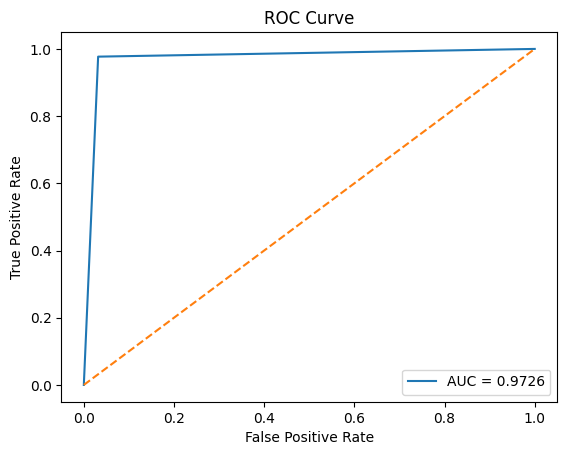

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


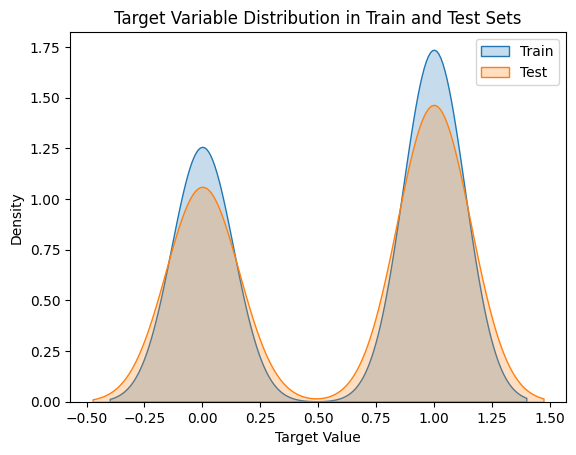

In [15]:
# KDE plot for target variable
sns.kdeplot(y_train, label="Train", fill=True)
sns.kdeplot(y_test, label="Test", fill=True)
plt.legend()
plt.xlabel("Target Value")  # You might need to adjust this label
plt.ylabel("Density")
plt.title("Target Variable Distribution in Train and Test Sets")
plt.show()

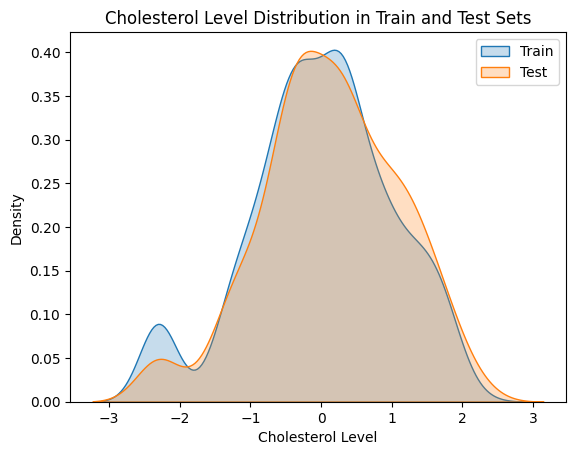

In [16]:
# Convert X_train and X_test back to DataFrame to extract 'chol'
# Get the columns from the original dataframe before converting to numpy array
X_train_df = pd.DataFrame(X_train, columns=df.columns[1:-1]) # Exclude target column (if for 'Cardiovascular_Disease_Dataset.csv' dataset then this will be like [1: -1] )
X_test_df = pd.DataFrame(X_test, columns=df.columns[1:-1]) # Exclude target column


# KDE plot for cholesterol levels
sns.kdeplot(X_train_df['serumcholestrol'], label="Train", fill=True)#for the 'Cardiovascular_Disease_Dataset.csv' dataset the 'chol' will be replaced with 'serumcholestrol'
sns.kdeplot(X_test_df['serumcholestrol'], label="Test", fill=True)
plt.legend()
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("Cholesterol Level Distribution in Train and Test Sets")
plt.show()

In [17]:
# Compute learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    best_tree, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Print learning curve summary
print("Learning curve computed successfully.")


Learning curve computed successfully.


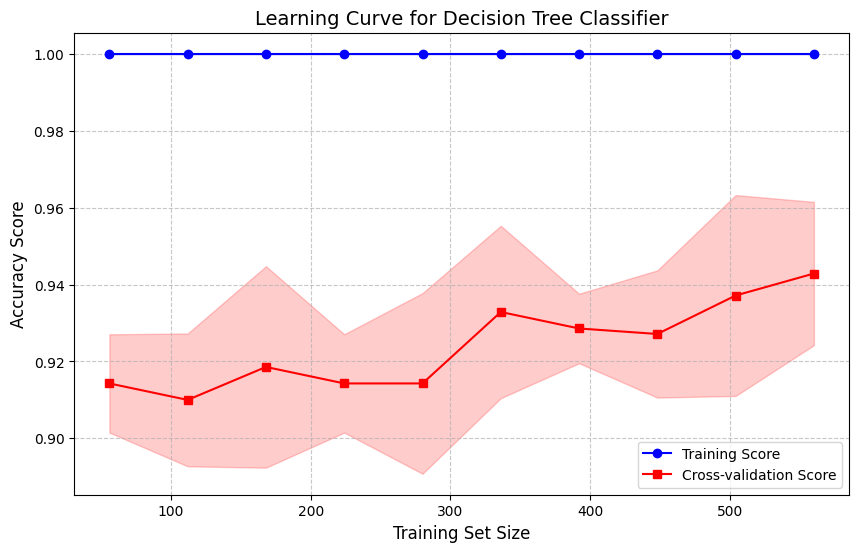

In [18]:
plt.figure(figsize=(10, 6))  # Adjusted figure size for better clarity

# Plot training curve
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Plot validation curve
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red", marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Learning Curve for Decision Tree Classifier", fontsize=14)
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.7)  # Added grid for readability
plt.show()


In [19]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)  # This line was causing the error
val_mean = np.mean(test_scores, axis=1)  # Use 'test_scores' instead which is already calculated

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation Scores: [0.91428571 0.91       0.91857143 0.91428571 0.91428571 0.93285714
 0.92857143 0.92714286 0.93714286 0.94285714]
Model is performing well (good fit).
